# Explore here

In [50]:
import pandas as pd
import numpy as np 

# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
data = pd.read_csv(url, sep=";")

# Display the first few rows
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nSummary statistics:")
print(data.describe(include='all'))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed


Missing values in each column:
Series([], dtype: int64)


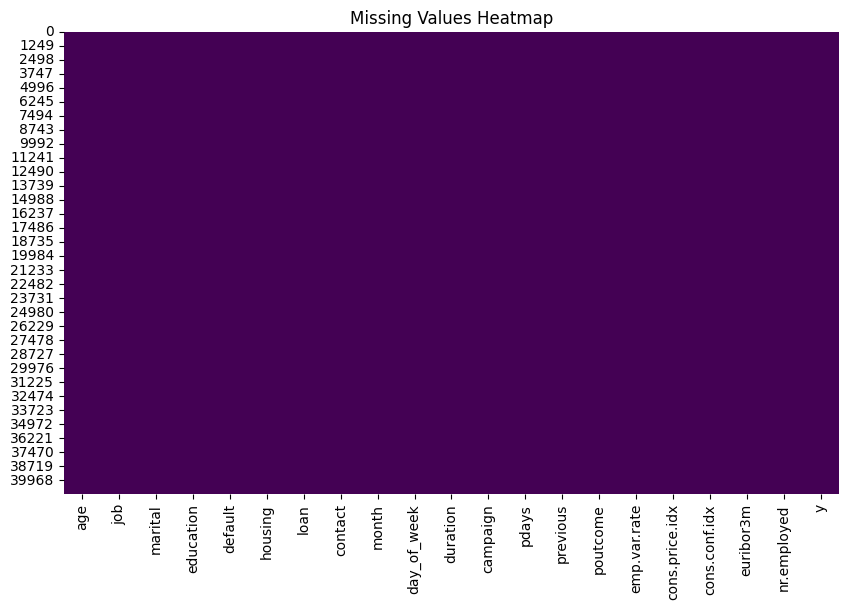

In [51]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [52]:
# Impute missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [53]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if found
if duplicates > 0:
    data.drop_duplicates(inplace=True)


Number of duplicate rows: 12


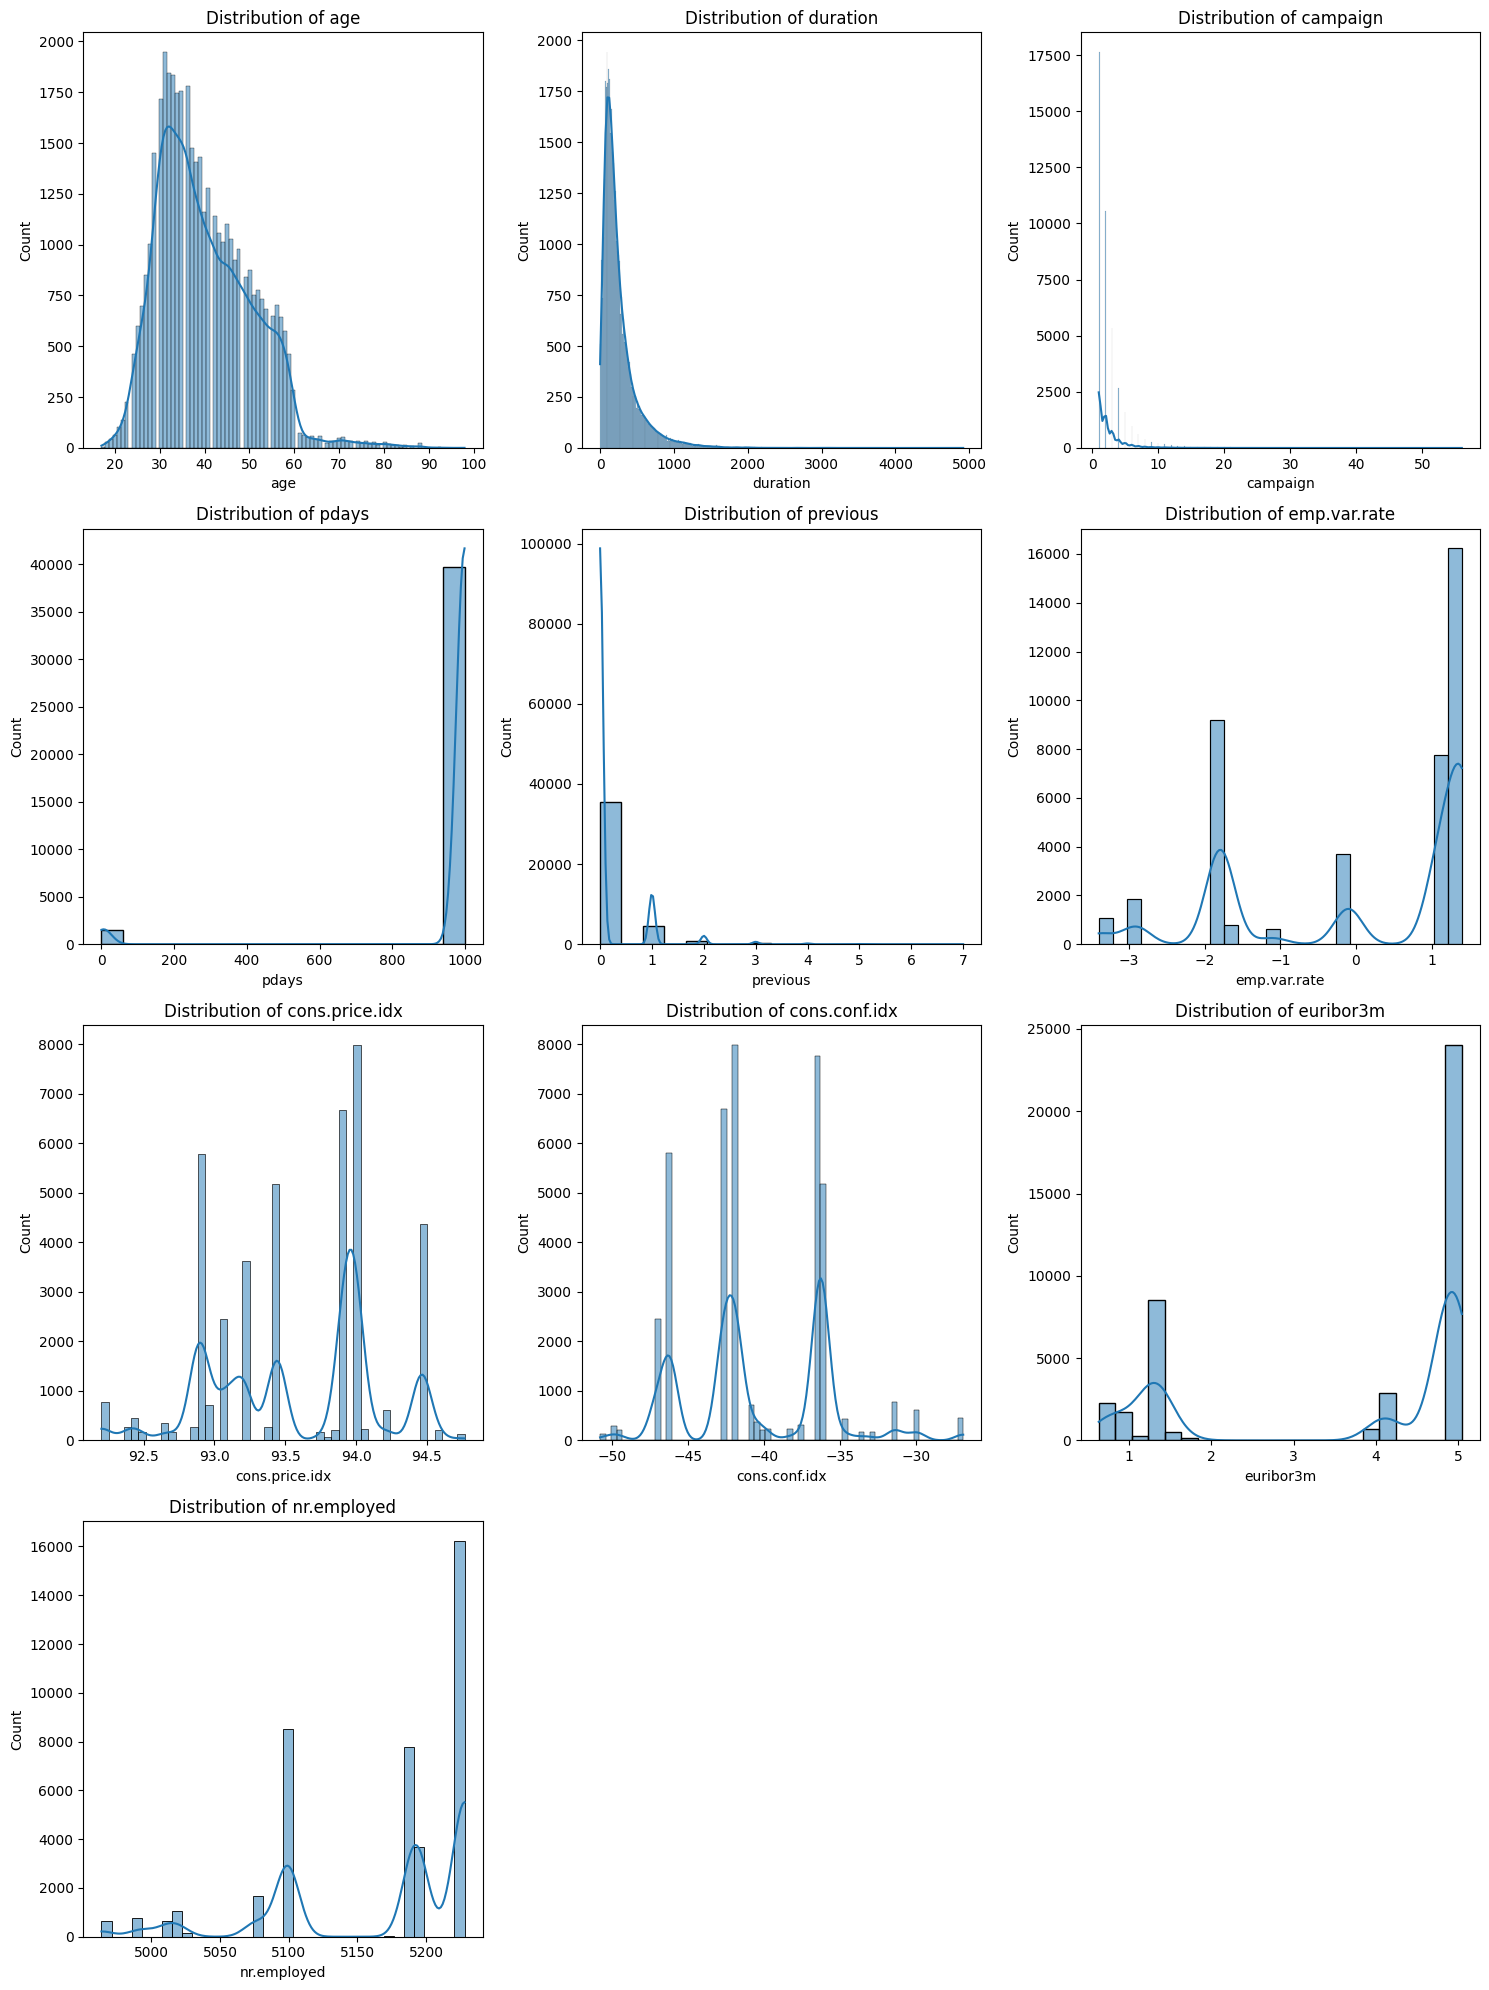

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate rows needed

# Distribution plots
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

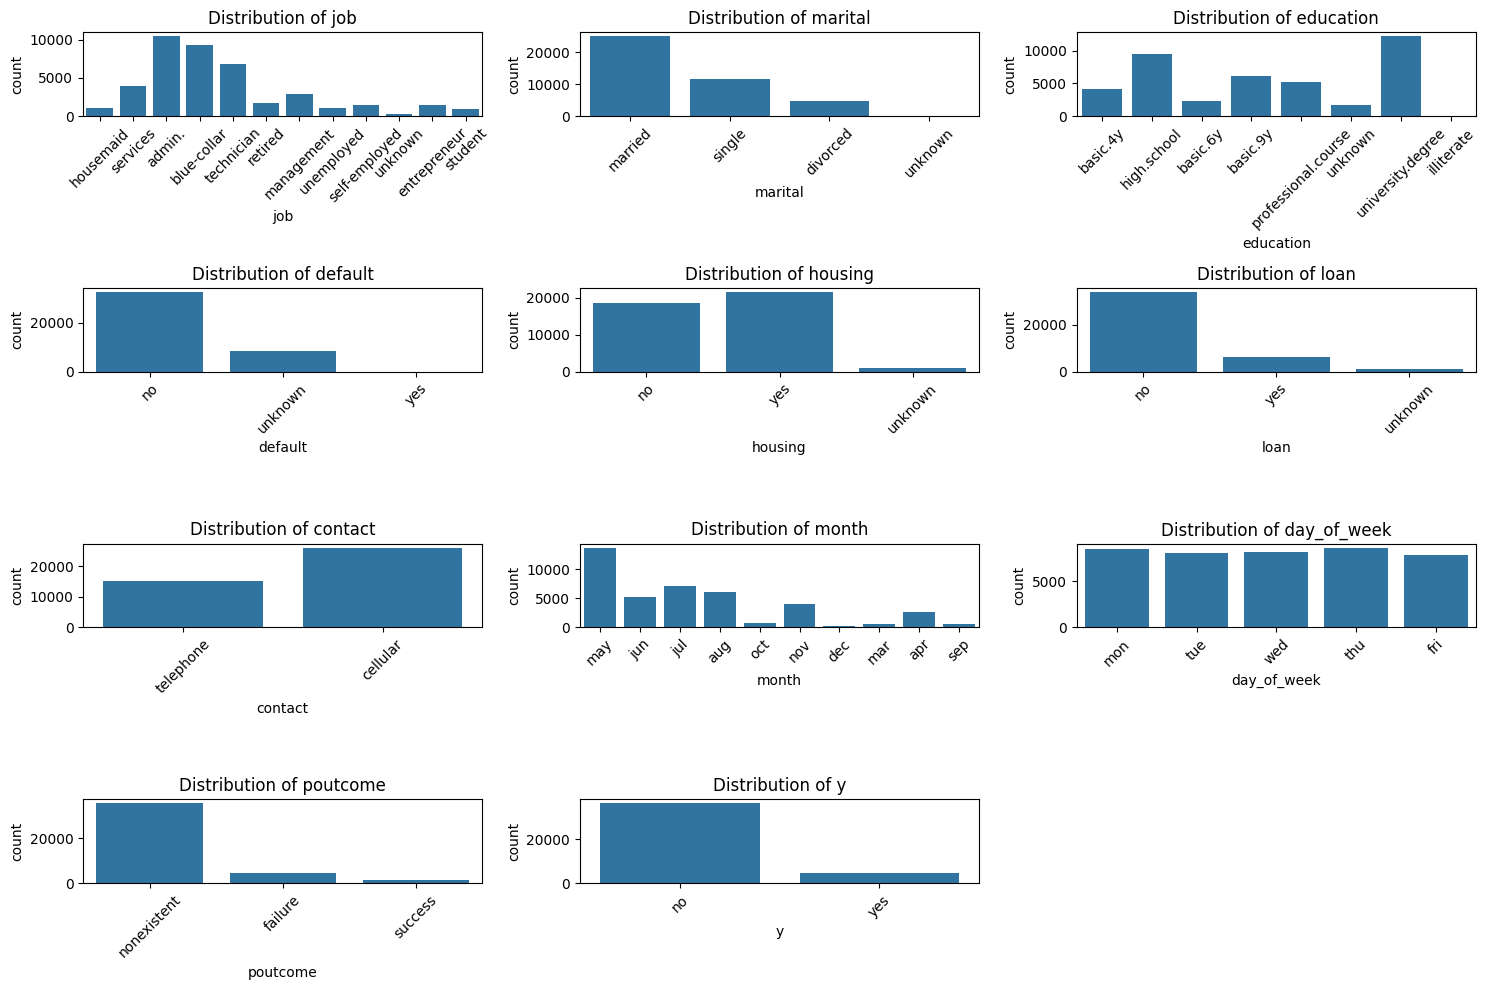

In [55]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

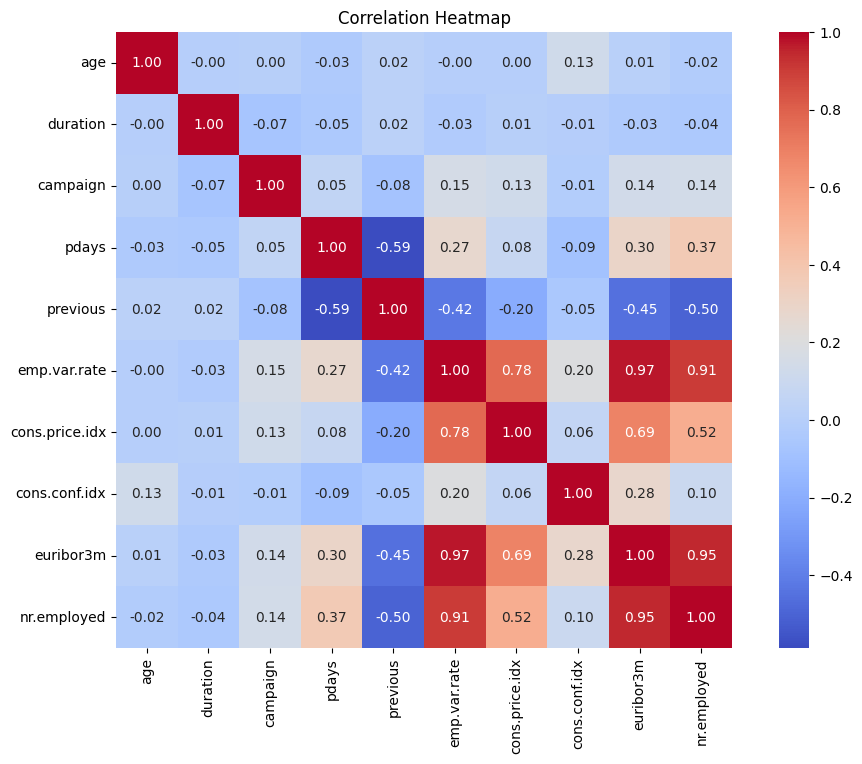

In [56]:
plt.figure(figsize=(12, 8))
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

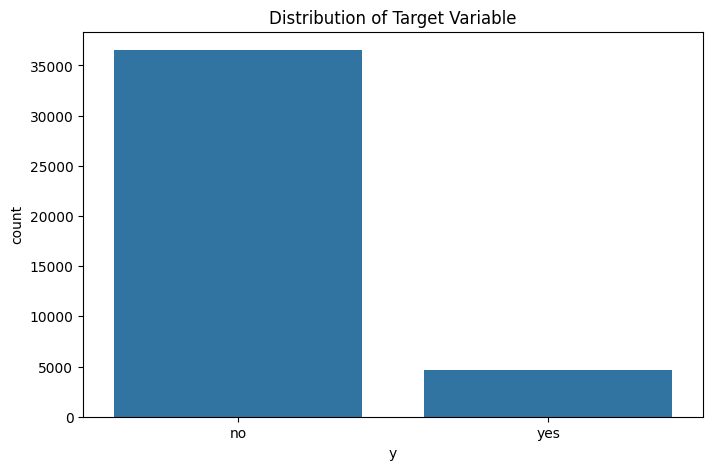

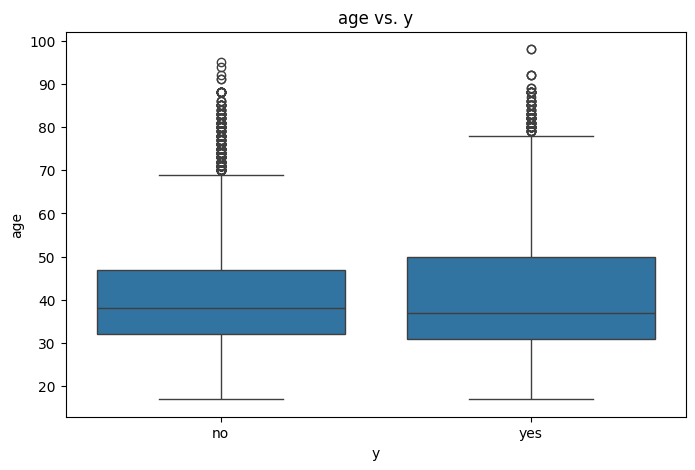

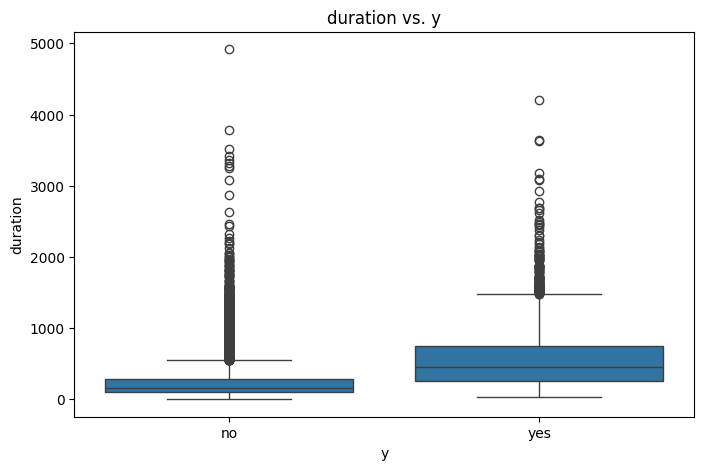

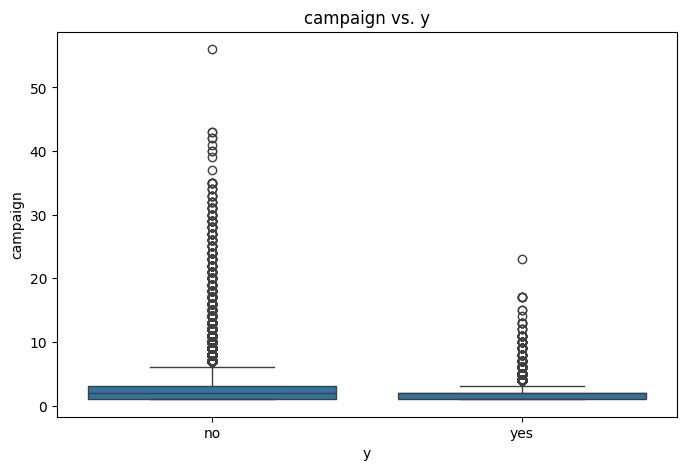

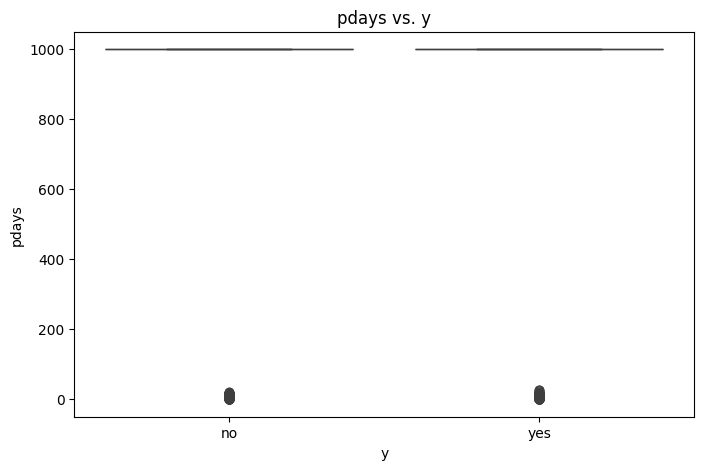

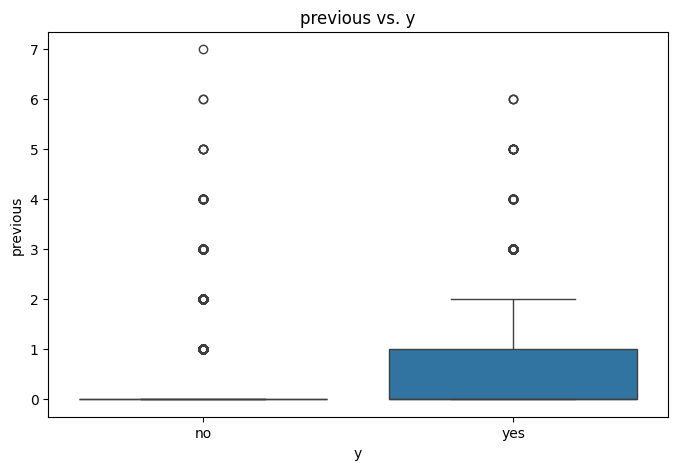

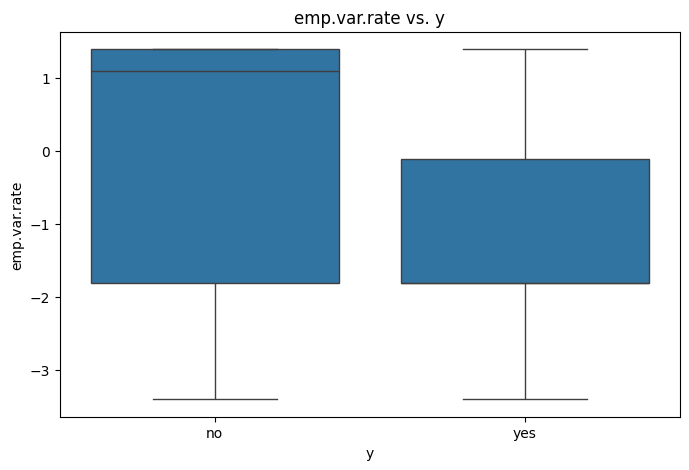

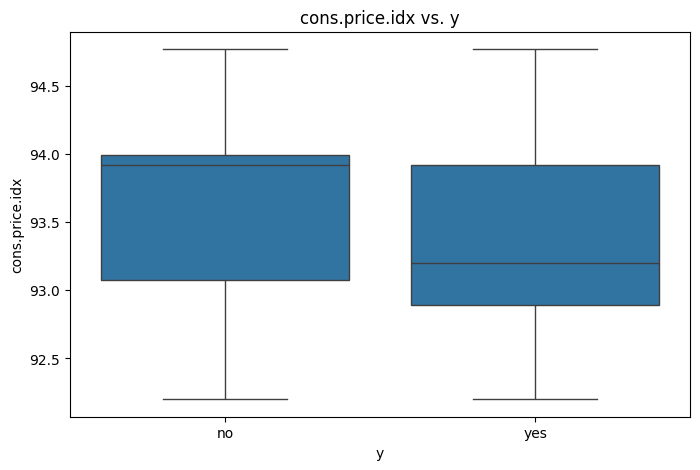

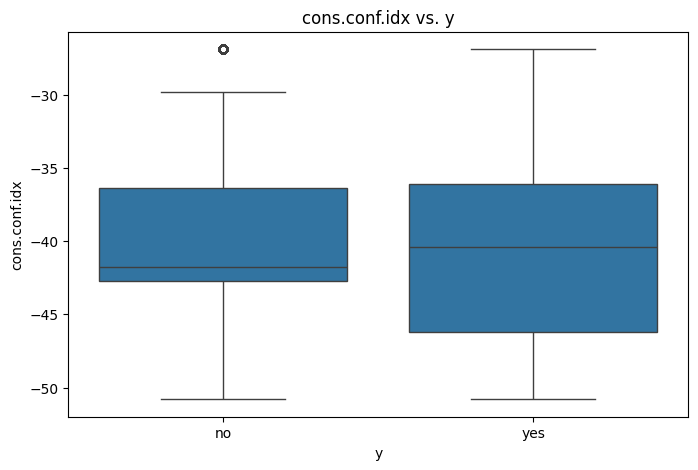

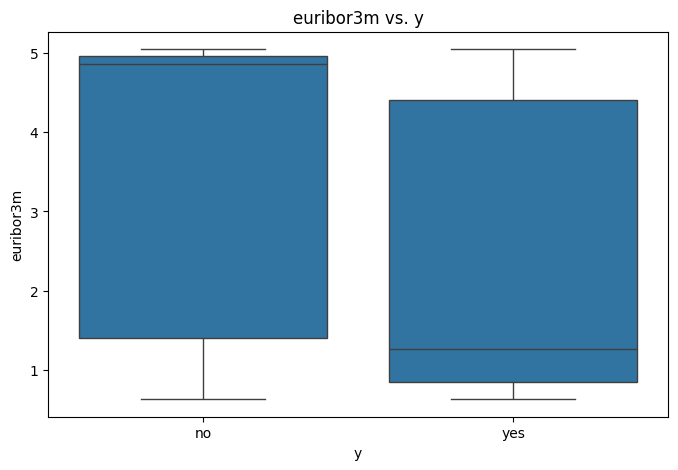

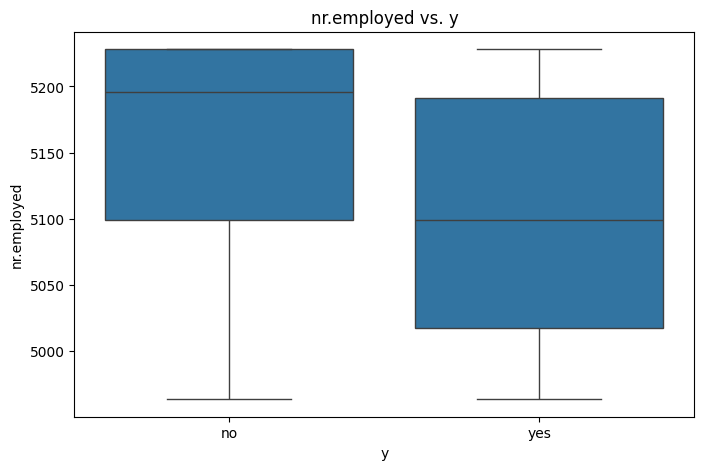

In [57]:
target = 'y'  # Assuming 'y' is the target variable

# Explore the relationship between features and the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x=target)
plt.title('Distribution of Target Variable')
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f'{col} vs. {target}')
    plt.show()


Number of outliers detected using Z-score: age                369
duration           861
campaign           869
pdays             1515
previous          1064
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64
Total number of outliers: age                369
duration           861
campaign           869
pdays             1515
previous          1064
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


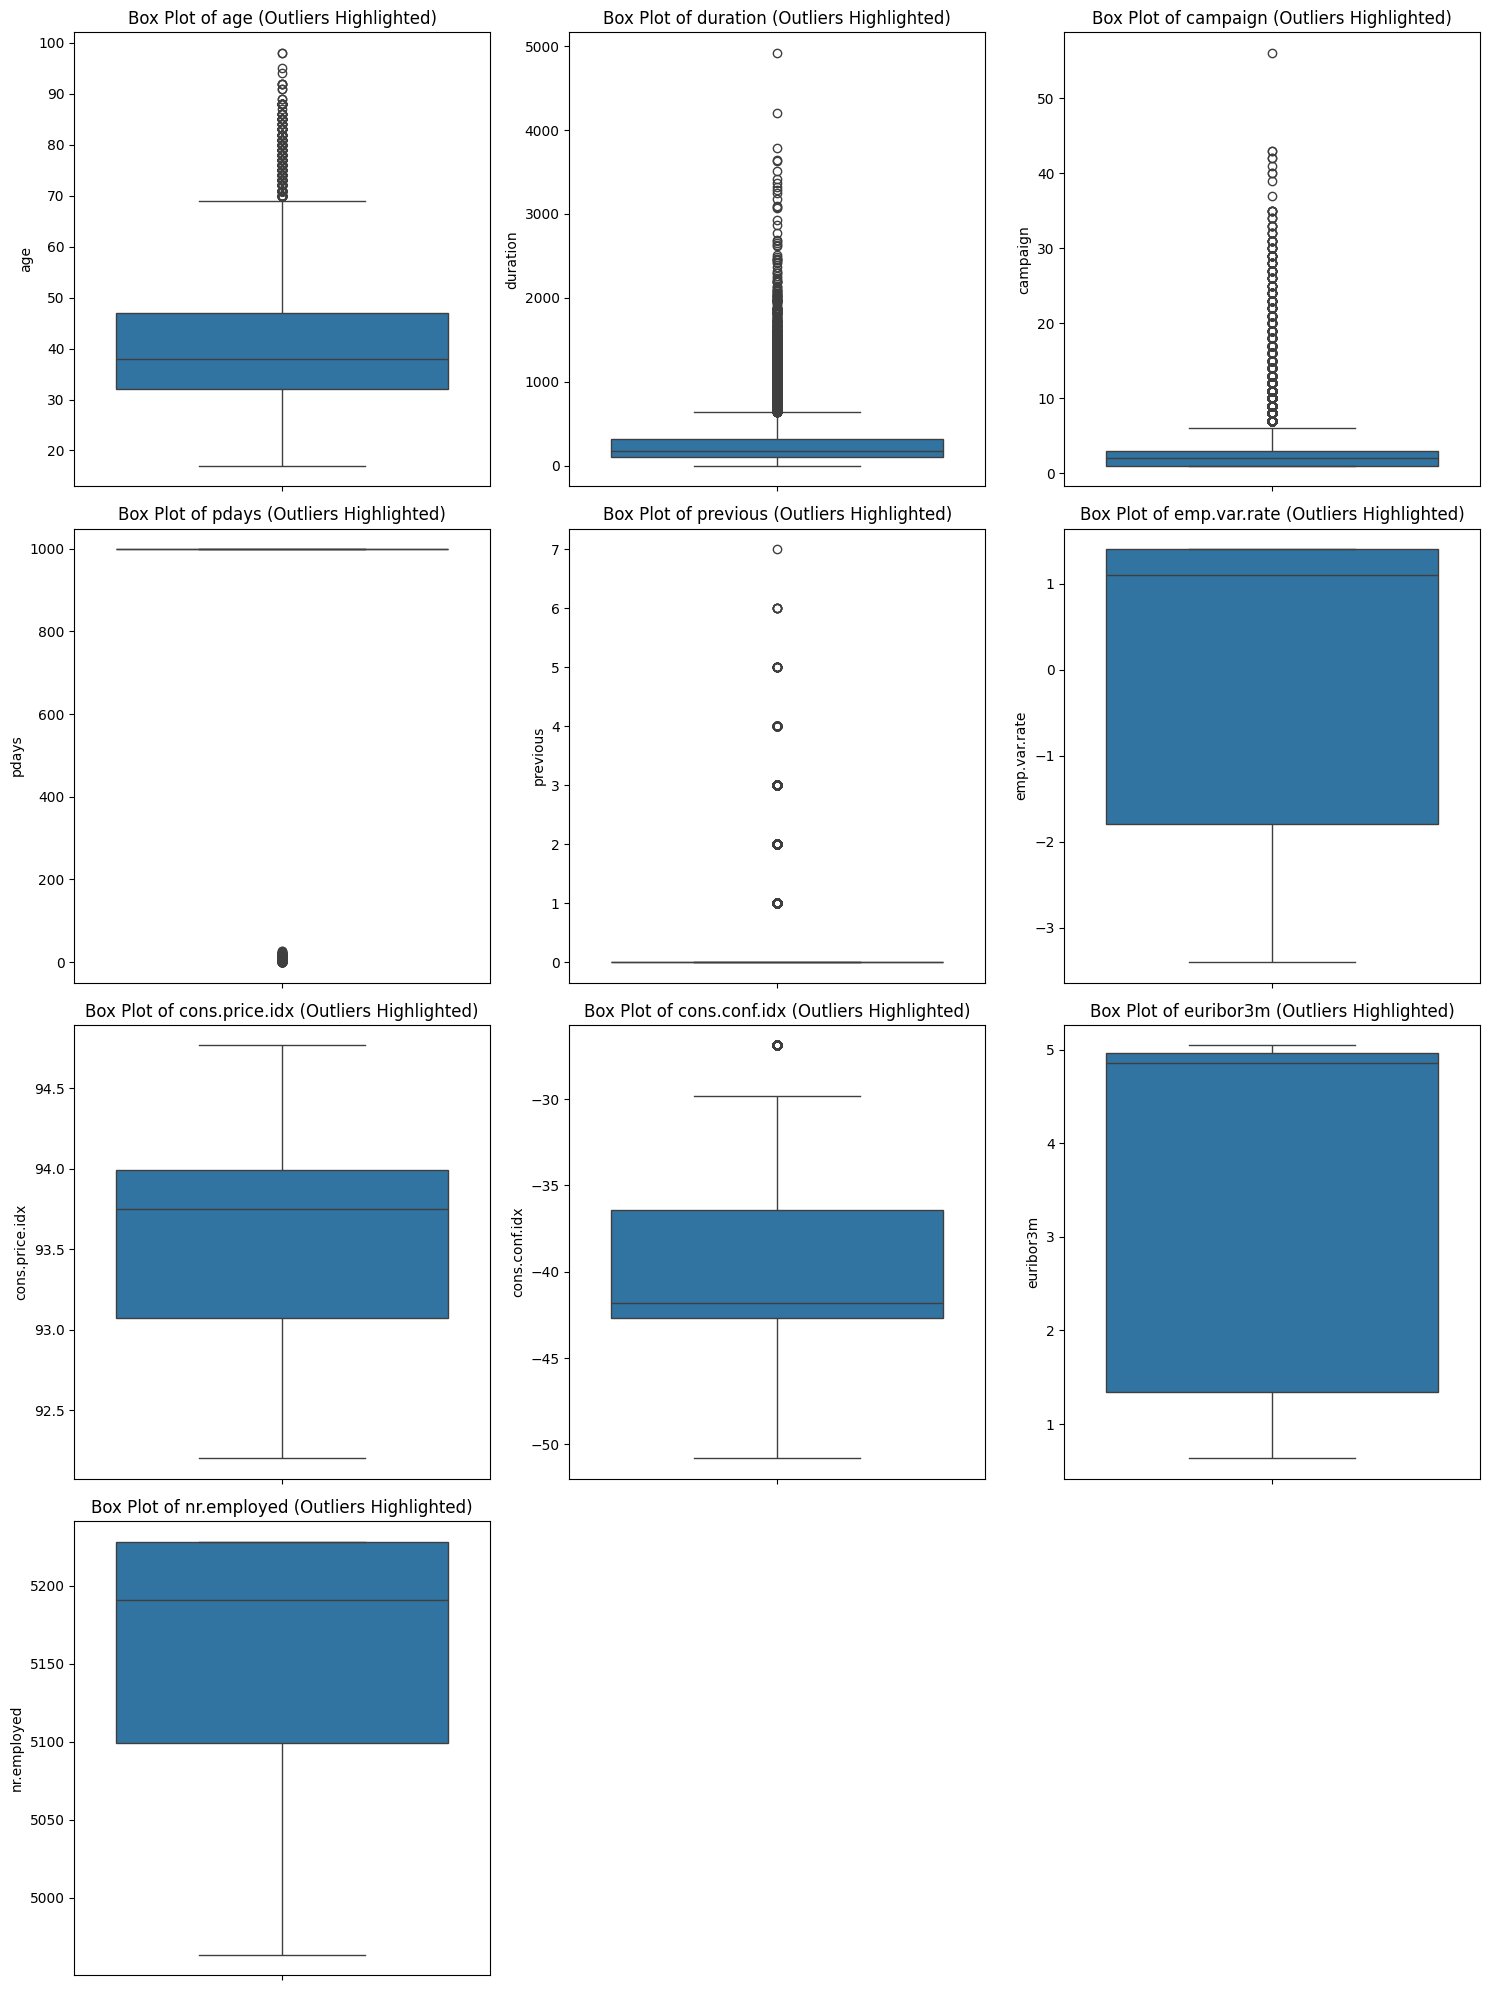

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Z-score method for outlier detection
z_scores = np.abs(stats.zscore(data[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)  # Count outliers for each column
total_outliers = (z_scores > 3).sum()  # Total outliers across all columns
print(f"\nNumber of outliers detected using Z-score: {outliers}")
print(f"Total number of outliers: {total_outliers}")

# Determine the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Calculate rows needed

# Visualize outliers using box plots
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col} (Outliers Highlighted)')
plt.tight_layout()
plt.show()

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      3645
         1.0       0.67      0.34      0.45       473

    accuracy                           0.90      4118
   macro avg       0.79      0.66      0.70      4118
weighted avg       0.89      0.90      0.89      4118



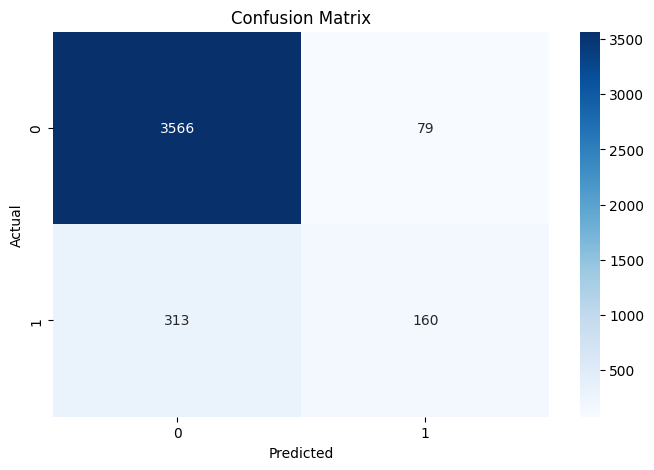

In [59]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), hyperparams, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid.best_params_}")

# Evaluate optimized model
best_model = grid.best_estimator_
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy:.2f}")

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [45]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [46]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [6]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


In [7]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [8]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.0,0.333333,0.175924,0.512287,0.0


In [9]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8919378338999514

In [13]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [14]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [15]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
accuracy_score(y_test, y_pred)

0.8938805245264692

In [18]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))